In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# pip stuff

In [ ]:
# !pip install -U accelerate
# !pip install -U transformers

# meh

In [ ]:
# cd /content/drive/MyDrive/DL1402_2/HW3_DEEP

In [4]:
# import os
# import pandas as pd
# import shutil

# # Define the base dataset directory
# dataset_dir = '/home/CinCin/code/dataset'

# # Define the directories
# directories = {
#     'train': os.path.join(dataset_dir, 'train'),
#     'valid': os.path.join(dataset_dir, 'valid'),
#     'test': os.path.join(dataset_dir, 'test')
# }

# # Define the target directories
# target_directories = {
#     'train': os.path.join(dataset_dir, 'train3'),
#     'valid': os.path.join(dataset_dir, 'valid3'),
#     'test': os.path.join(dataset_dir, 'test3')
# }

# # Create target directories if they do not exist
# for target_dir in target_directories.values():
#     os.makedirs(target_dir, exist_ok=True)

# # Define the CSV files
# csv_files = {
#     'train': os.path.join(dataset_dir, 'train_captions3.csv'),
#     'valid': os.path.join(dataset_dir, 'valid_captions3.csv'),
#     'test': os.path.join(dataset_dir, 'test_captions3.csv')
# }

# # Function to copy images based on the CSV file
# def copy_images(csv_file, source_dir, target_dir):
#     df = pd.read_csv(csv_file)
#     for index, row in df.iterrows():
#         image_id = row['ID']
#         source_path = os.path.join(source_dir, f"{image_id}.jpg")
#         target_path = os.path.join(target_dir, f"{image_id}.jpg")
#         if os.path.exists(source_path):
#             shutil.copy(source_path, target_path)
#         else:
#             print(f"Image {source_path} not found!")

# # Copy images for each set
# for set_name, csv_file in csv_files.items():
#     copy_images(csv_file, directories[set_name], target_directories[set_name])

# print("Images copied successfully!")


Images copied successfully!


In [ ]:
# !wget https://zenodo.org/api/records/10821435/files-archive

In [ ]:
# !unzip files-archive -d dataset

In [ ]:
# !unzip dataset/train_images.zip -d dataset
# !unzip dataset/valid_images.zip -d dataset
# !unzip dataset/test_images.zip -d dataset

In [ ]:
# import os

# def count_files(directory_path):
#     try:
#         num_files = len([file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))])
#         return num_files
#     except FileNotFoundError:
#         return "Directory not found."
#     except Exception as e:
#         return str(e)

# # Replace with the actual directory path
# directory_path = '/content/drive/MyDrive/DL1402_2/HW3_DEEP/dataset/test3'
# print(f"Number of files in '{directory_path}': {count_files(directory_path)}")
# #train 37330,  v 6672, test 6780

In [ ]:
# import os
# import pandas as pd

# def filter_csv_for_rgb_images(original_csv_path, rgb_image_dir, output_csv_path):
#     # Load the original CSV file
#     df = pd.read_csv(original_csv_path)

#     # List the image files in the RGB image directory
#     rgb_images = set(os.listdir(rgb_image_dir))

#     # Extract the image IDs from the filenames (assuming filenames are like 'ROCOv2_2023_test_000001.jpg')
#     rgb_image_ids = {os.path.splitext(img)[0] for img in rgb_images}

#     # Filter the original data frame to include only the entries for RGB images
#     filtered_df = df[df['ID'].isin(rgb_image_ids)]

#     # Save the filtered data frame to a new CSV file
#     filtered_df.to_csv(output_csv_path, index=False)

# # Define the root directory
# # root_dir = 'path_to_your_dataset_root'

# # Paths for original CSV files
# train_csv_path = os.path.join(root_dir, 'train_captions.csv')
# valid_csv_path = os.path.join(root_dir, 'valid_captions.csv')
# test_csv_path = os.path.join(root_dir, 'test_captions.csv')

# # Directories containing only RGB images
# train_rgb_dir = os.path.join(root_dir, 'train3')
# valid_rgb_dir = os.path.join(root_dir, 'valid3')
# test_rgb_dir = os.path.join(root_dir, 'test3')

# # Output paths for the new CSV files
# train_output_csv_path = os.path.join(root_dir, 'train_captions3.csv')
# valid_output_csv_path = os.path.join(root_dir, 'valid_captions3.csv')
# test_output_csv_path = os.path.join(root_dir, 'test_captions3.csv')

# # Filter and create new CSV files
# filter_csv_for_rgb_images(train_csv_path, train_rgb_dir, train_output_csv_path)
# filter_csv_for_rgb_images(valid_csv_path, valid_rgb_dir, valid_output_csv_path)
# filter_csv_for_rgb_images(test_csv_path, test_rgb_dir, test_output_csv_path)


# load model

## ...

In [ ]:
# import os, torch, transformers
# import matplotlib.pyplot as plt
# from PIL import Image
# from torchvision import transforms
# from io import BytesIO
# from torchvision.utils import make_grid

# ckpt_name = 'aehrc/medicap'

# dataset_dir = '/datasets/work/hb-mlaifsp-mm/work/datasets'

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# encoder_decoder = transformers.AutoModel.from_pretrained(ckpt_name, trust_remote_code=True).to(device)

# Total number of parameters: 113446720


In [ ]:
# from transformers import AutoImageProcessor, ViTMAEForPreTraining
# from PIL import Image
# import requests

# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

# processor = AutoImageProcessor.from_pretrained('facebook/vit-mae-large')
# model = ViTMAEForPreTraining.from_pretrained('facebook/vit-mae-large')

# total_params = sum(p.numel() for p in model.parameters())

# print(f"Total number of parameters: {total_params}")

## orginal facebook facebook/vit-mae-base

In [7]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the models
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base", force_download = True)
# model = ViTForImageClassification.from_pretrained("facebook/vit-mae-base",force_download = True)

# # Save the models locally
# feature_extractor.save_pretrained("./vit_feature_extractor")
# model.save_pretrained("./vit_model")

# feature_extractor = ViTFeatureExtractor.from_pretrained("./vit_feature_extractor")
# model = ViTForImageClassification.from_pretrained("./vit_model")

/home/CinCin/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/217 [00:00<?, ?B/s]

/home/CinCin/miniconda3/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [33]:
total_params = sum(p.numel() for p in model.parameters())

print(f"Total number of parameters: {total_params}")

Total number of parameters: 85800194


In [5]:
# from transformers import ViTFeatureExtractor,ViTForImageClassification

# feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")
# model = ViTForImageClassification.from_pretrained("facebook/vit-mae-base")

# total_params = sum(p.numel() for p in model.parameters())

# print(f"Total number of parameters: {total_params}")

# Dataset

## orginal

In [ ]:
# import os
# from PIL import Image
# import torch
# from torch.utils.data import Dataset
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms
# import numpy as np
# from skimage import io


# # orginal
# class ROCODataset(Dataset):
#     def __init__(
#         self,
#         root_dir:str,
#         train:bool=False,
#         valid:bool=False,
#         test:bool=False,
#         transform=None
#     ):
#         self.root_dir = root_dir
#         self.transform = transform

#         self.train=train
#         self.valid=valid
#         self.test=test

#         self.train_dir = os.path.join(root_dir, 'train3')
#         self.val_dir = os.path.join(root_dir, 'valid3')
#         self.test_dir = os.path.join(root_dir, 'test3')

#         self.captions = {}
#         caption_files = {
#             'train': f'{root_dir}/train_captions3.csv',
#             'valid': f'{root_dir}/valid_captions3.csv',
#             'test':  f'{root_dir}/test_captions3.csv'
#         }

#         for caption in caption_files:
#           df = pd.read_csv(caption_files[caption])
#           self.captions[caption] = df.set_index('ID').to_dict()['Caption']

#         df = pd.read_csv(f'{root_dir}/cui_mapping.csv')
#         self.cui_mapping = df.set_index('CUI').to_dict()['Canonical name']

#         self.train_len = len(self.captions['train'])
#         self.valid_len = len(self.captions['valid'])
#         self.test_len = len(self.captions['test'])

#     def __len__(self):
#         ans = 0

#         if self.train:
#           ans += self.train_len
#         if self.valid:
#           ans += self.valid_len
#         if self.test:
#           ans += self.test_len

#         return ans

#     def __getitem__(self, idx) -> tuple[torch.Tensor, str]:
#       file_name = ''
#       image_loc = ''
#       caption = ''
#       if self.train:
#         file_name = list(self.captions['train'].keys())[idx]
#         caption = self.captions['train'][file_name]
#         image_loc = os.path.join(self.root_dir, 'train', f'{file_name}.jpg')
#       if self.valid:
#         file_name = list(self.captions['valid'].keys())[idx]
#         caption = self.captions['valid'][file_name]
#         image_loc = os.path.join(self.root_dir, 'valid', f'{file_name}.jpg')
#       if self.test:
#         file_name = list(self.captions['test'].keys())[idx]
#         caption = self.captions['test'][file_name]
#         image_loc = os.path.join(self.root_dir, 'test', f'{file_name}.jpg')


#       img = torch.from_numpy(io.imread(image_loc))

#       if self.transform:
#         img = self.transform(img)

#       return {'pixel_values': img, 'labels': caption}

In [ ]:
# # orginal rgb

# import os
# from PIL import Image
# import torch
# from torch.utils.data import Dataset
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms
# import numpy as np
# from skimage import io

# class ROCODataset(Dataset):
#     def __init__(
#         self,
#         root_dir:str,
#         train:bool=False,
#         valid:bool=False,
#         test:bool=False,
#         transform=None
#     ):
#         self.root_dir = root_dir
#         self.transform = transform

#         self.train=train
#         self.valid=valid
#         self.test=test

#         self.train_dir = os.path.join(root_dir, 'train')
#         self.val_dir = os.path.join(root_dir, 'valid')
#         self.test_dir = os.path.join(root_dir, 'test')

#         self.captions = {}
#         caption_files = {
#             'train': f'{root_dir}/train_captions.csv',
#             'valid': f'{root_dir}/valid_captions.csv',
#             'test':  f'{root_dir}/test_captions.csv'
#         }

#         for caption in caption_files:
#           df = pd.read_csv(caption_files[caption])
#           self.captions[caption] = df.set_index('ID').to_dict()['Caption']

#         df = pd.read_csv(f'{root_dir}/cui_mapping.csv')
#         self.cui_mapping = df.set_index('CUI').to_dict()['Canonical name']

#         self.train_len = len(self.captions['train'])
#         self.valid_len = len(self.captions['valid'])
#         self.test_len = len(self.captions['test'])

#     def __len__(self):
#         ans = 0

#         if self.train:
#           ans += self.train_len
#         if self.valid:
#           ans += self.valid_len
#         if self.test:
#           ans += self.test_len

#         return ans

#     def __getitem__(self, idx) -> tuple[torch.Tensor, str]:
#       file_name = ''
#       image_loc = ''
#       caption = ''
#       if self.train:
#         file_name = list(self.captions['train'].keys())[idx]
#         caption = self.captions['train'][file_name]
#         image_loc = os.path.join(self.root_dir, 'train', f'{file_name}.jpg')
#       if self.valid:
#         file_name = list(self.captions['valid'].keys())[idx]
#         caption = self.captions['valid'][file_name]
#         image_loc = os.path.join(self.root_dir, 'valid', f'{file_name}.jpg')
#       if self.test:
#         file_name = list(self.captions['test'].keys())[idx]
#         caption = self.captions['test'][file_name]
#         image_loc = os.path.join(self.root_dir, 'test', f'{file_name}.jpg')


#         img = io.imread(image_loc)

#         # Check if the image has 3 channels
#         if img.ndim == 3 and img.shape[2] == 3:
#             img = torch.from_numpy(img)

#             if self.transform:
#                 img = self.transform(img)

#             # # Convert caption to label
#             # label = self.label_encoder[caption]

#             return {'pixel_values': img, 'labels': caption}
#         else:
#             # Skip the current image and fetch the next one
#             new_idx = idx + 1
#             if new_idx >= self.__len__():
#                 new_idx = 0  # Wrap around if we reach the end
#             return self.__getitem__(new_idx)


## image and caption

In [40]:
# import os
# from PIL import Image
# import torch
# from torch.utils.data import Dataset
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from torchvision import transforms
# from skimage import io

# class ROCODataset(Dataset):
#     def __init__(
#         self,
#         root_dir: str,
#         train: bool = False,
#         valid: bool = False,
#         test: bool = False,
#         transform=None
#     ):
#         self.root_dir = root_dir
#         self.transform = transform
#         self.train = train
#         self.valid = valid
#         self.test = test

#         self.train_dir = os.path.join(root_dir, 'train3')
#         self.val_dir = os.path.join(root_dir, 'valid3')
#         self.test_dir = os.path.join(root_dir, 'test3')

#         self.captions = {}
#         caption_files = {
#             'train': f'{root_dir}/train_captions3.csv',
#             'valid': f'{root_dir}/valid_captions3.csv',
#             'test': f'{root_dir}/test_captions3.csv'
#         }

#         for caption in caption_files:
#             df = pd.read_csv(caption_files[caption])
#             self.captions[caption] = df.set_index('ID').to_dict()['Caption']

#         df = pd.read_csv(f'{root_dir}/cui_mapping.csv')
#         self.cui_mapping = df.set_index('CUI').to_dict()['Canonical name']

#         self.train_len = len(self.captions['train'])
#         self.valid_len = len(self.captions['valid'])
#         self.test_len = len(self.captions['test'])

#     def __len__(self):
#         length = 0
#         if self.train:
#             length += self.train_len
#         if self.valid:
#             length += self.valid_len
#         if self.test:
#             length += self.test_len
#         return length

#     def __getitem__(self, idx) -> dict:
#         file_name = ''
#         image_loc = ''
#         caption = ''

#         if self.train:
#             file_name = list(self.captions['train'].keys())[idx]
#             caption = self.captions['train'][file_name]
#             image_loc = os.path.join(self.root_dir, 'train', f'{file_name}.jpg')
#         elif self.valid:
#             file_name = list(self.captions['valid'].keys())[idx]
#             caption = self.captions['valid'][file_name]
#             image_loc = os.path.join(self.root_dir, 'valid', f'{file_name}.jpg')
#         elif self.test:
#             file_name = list(self.captions['test'].keys())[idx]
#             caption = self.captions['test'][file_name]
#             image_loc = os.path.join(self.root_dir, 'test', f'{file_name}.jpg')

#         img = io.imread(image_loc)

#         if self.transform:
#             img = self.transform(img)

#         return {'pixel_values': img, 'labels': caption}


# # Define a transform to resize images to 256x256 pixels
# data_transform = transforms.Compose([
#     transforms.ToPILImage(),  # Convert numpy array to PIL image
#     transforms.Resize((224, 224)),  # Resize the image to 256x256 pixels
#     transforms.ToTensor(),  # Convert PIL image to tensor
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])


## image and masked

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from skimage import io
from transformers import ViTFeatureExtractor, ViTForImageClassification
from torchvision import transforms

In [8]:
class ROCODataset_imag_mask(Dataset):
    
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform

        # Load your dataset here, assuming it provides paths to original images
        self.image_paths = [os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        image = io.imread(img_path)

        if self.transform:
            image = self.transform(image)
        # Simulate masked image by randomly corrupting parts of the original image
        masked_image, mask = self.create_masked_image(image)



        return {'pixel_values': masked_image, 'targets': image, 'mask_index': mask}

    def create_masked_image(self, image):
        masked_image = np.copy(image)

        # Simulate masking by setting approximately 75% of pixels to zero (black)
        masked_image = np.copy(masked_image)
        mask = np.random.rand(*masked_image.shape[1:]) > 0.25  # Mask out approximately 75% of pixels
        mask = np.expand_dims(mask, axis=0)  # Shape will be (224, 224, 1)
        mask = np.repeat(mask, 3, axis=0)    # Shape will be (224, 224, 3)
        masked_image[mask] = 0

        return masked_image, mask

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

# Example data transformation for resizing and converting to tensor
data_transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert numpy array to PIL image
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])


# train_data = ROCODataset(root_dir="/content/drive/MyDrive/DL1402_2/HW3_DEEP/dataset/test3", transform=data_transform)
train_data = ROCODataset_imag_mask(root_dir="/home/CinCin/code/dataset/train3", transform=data_transform)


loader = torch.utils.data.DataLoader(train_data, batch_size=1)
dataiter = iter(loader)
images = next(dataiter)  # Fetches the next batch from the iterator

print(images['pixel_values'].max(), images['pixel_values'].min())  # Check the range after normalization


tensor(2.6400) tensor(-2.1179)


In [12]:
print(images['pixel_values'].shape, images['targets'].shape,images['mask_index'].shape)  # Check the range after normalization


torch.Size([1, 3, 224, 224]) torch.Size([1, 3, 224, 224]) torch.Size([1, 3, 224, 224])


In [32]:
# imagenet_mean,imagenet_std (array([0.485, 0.456, 0.406]), array([0.229, 0.224, 0.225]))

(array([0.485, 0.456, 0.406]), array([0.229, 0.224, 0.225]))

## train - test - valid

In [9]:
root_dir = "/home/CinCin/code/dataset"

In [14]:
# train_data = ROCODataset(root_dir, train=True)
# valid_data = ROCODataset(root_dir, valid=True)
# test_data = ROCODataset(root_dir, test=True)
# Create instances of the dataset with the defined transform
# train_data = ROCODataset(root_dir, train=True, transform=data_transform)
# valid_data = ROCODataset(root_dir, valid=True, transform=data_transform)
# test_data = ROCODataset(root_dir, test=True, transform=data_transform)

In [15]:
# before filtering rgb : (59958, 9904, 9927) - train valid test
# after filtering:  (37330,6672,6780)
# len(train_data), len(valid_data),len(test_data)

In [16]:
# sample = train_data[0]
# print(sample['pixel_values'].shape)  # Example output shape: torch.Size([3, 256, 256])
# print(sample['labels'])

In [17]:
# ImageNet mean and std for normalization
imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def visualize(pixel_values, model):
    # Forward pass
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # Visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', pixel_values)

    # Masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # Store images and titles in a dictionary
    images = {
        "original": x[0],
        "masked": im_masked[0],
        "reconstruction": y[0],
        "reconstruction + visible": im_paste[0]
    }

    # Make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    for i, (title, image) in enumerate(images.items(), 1):
        plt.subplot(1, 4, i)
        show_image(image, title)

    plt.show()


# debuging

# Reconstruct

In [31]:
from transformers import ViTMAEForPreTraining

# Load the ViTMAEForPreTraining model
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base",force_download = True)

config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/448M [00:00<?, ?B/s]

In [40]:
directory = '/home/CinCin/code/dataset/train3'
files = os.listdir(directory)
print(files[:10])

['ROCOv2_2023_train_032910.jpg', 'ROCOv2_2023_train_047558.jpg', 'ROCOv2_2023_train_019962.jpg', 'ROCOv2_2023_train_010209.jpg', 'ROCOv2_2023_train_052126.jpg', 'ROCOv2_2023_train_043324.jpg', 'ROCOv2_2023_train_024151.jpg', 'ROCOv2_2023_train_037405.jpg', 'ROCOv2_2023_train_023141.jpg', 'ROCOv2_2023_train_000433.jpg']


In [44]:

# Function to show image
def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    image = image * torch.tensor(imagenet_std).view(1, 1, 3) + torch.tensor(imagenet_mean).view(1, 1, 3)
    image = torch.clip(image * 255, 0, 255).int()
    plt.imshow(image.numpy())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

# Function to visualize the images
def visualize(pixel_values, model):
    # Forward pass
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # Visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', pixel_values)

    # Masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # Store images and titles in a dictionary
    images = {
        "original": x[0],
        "masked": im_masked[0],
        "reconstruction": y[0],
        "reconstruction + visible": im_paste[0]
    }

    # Make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    for i, (title, image) in enumerate(images.items(), 1):
        plt.subplot(1, 4, i)
        show_image(image, title)

    plt.show()

# # Load an example image (replace 'example_image_path' with the actual path to your image)
# example_image_path = f'/home/CinCin/code/dataset/train3/{files[0]}'
# image = Image.open(example_image_path).convert('RGB')
# input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# # Visualize the results
# visualize(input_tensor, model)

## 1

In [46]:
# show_image(image,caption)

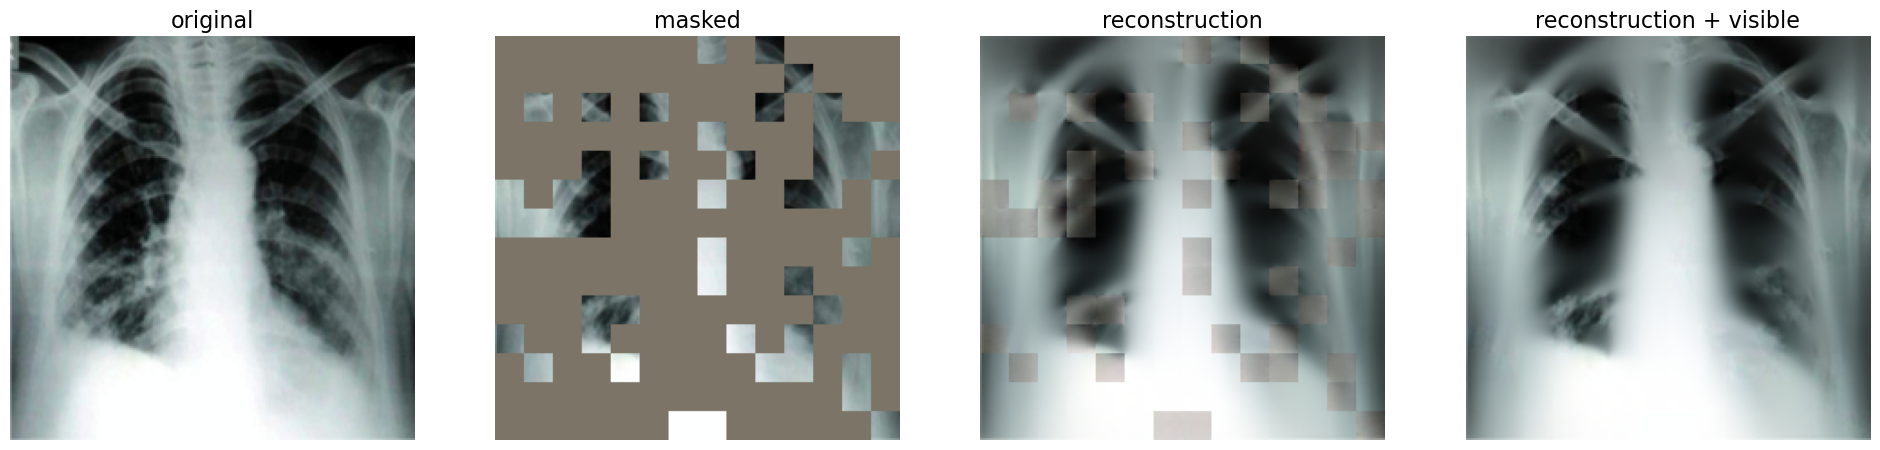

In [45]:
example_image_path = f'/home/CinCin/code/dataset/train3/{files[0]}'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model)

## 2

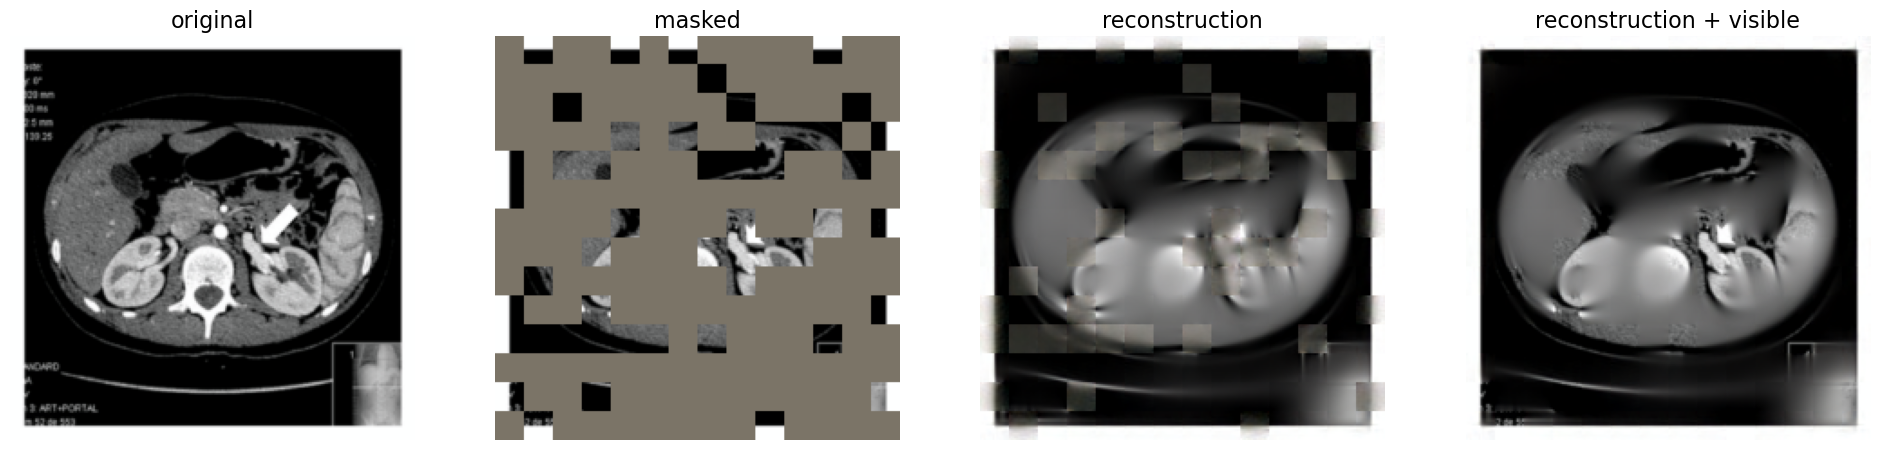

In [46]:
example_image_path = f'/home/CinCin/code/dataset/train3/{files[1]}'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model)

## 3

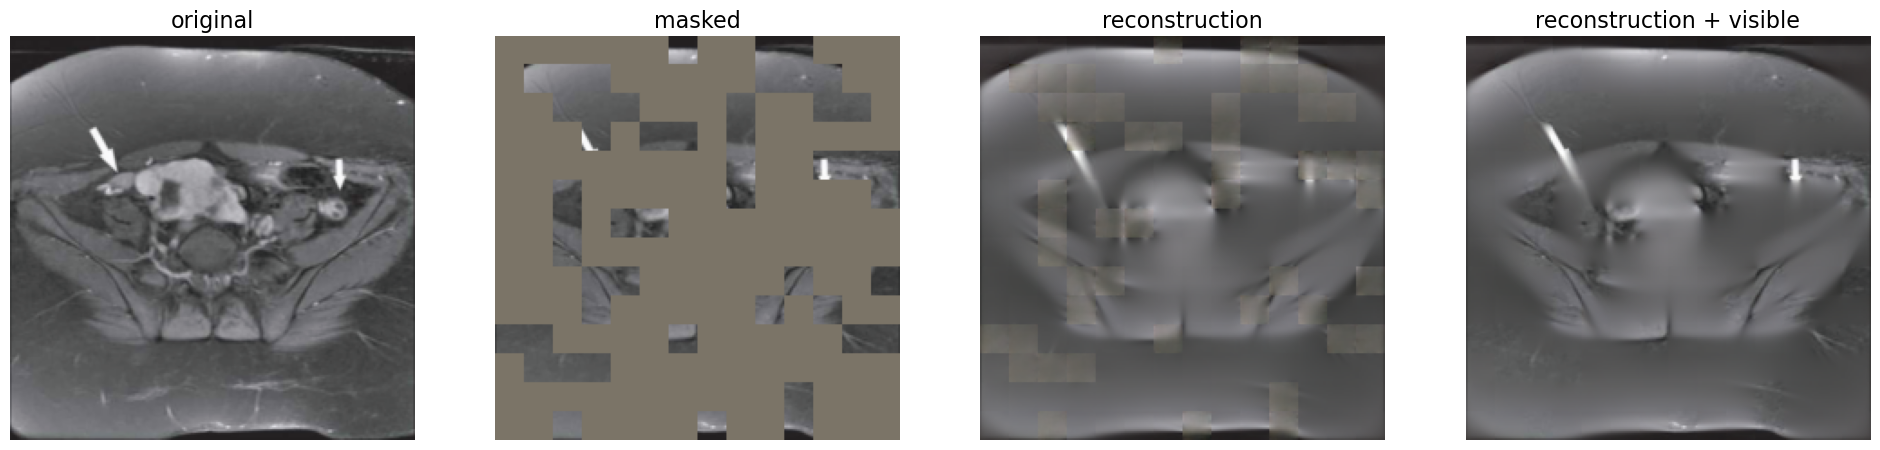

In [48]:
example_image_path = f'/home/CinCin/code/dataset/train3/{files[2]}'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model)

## 4

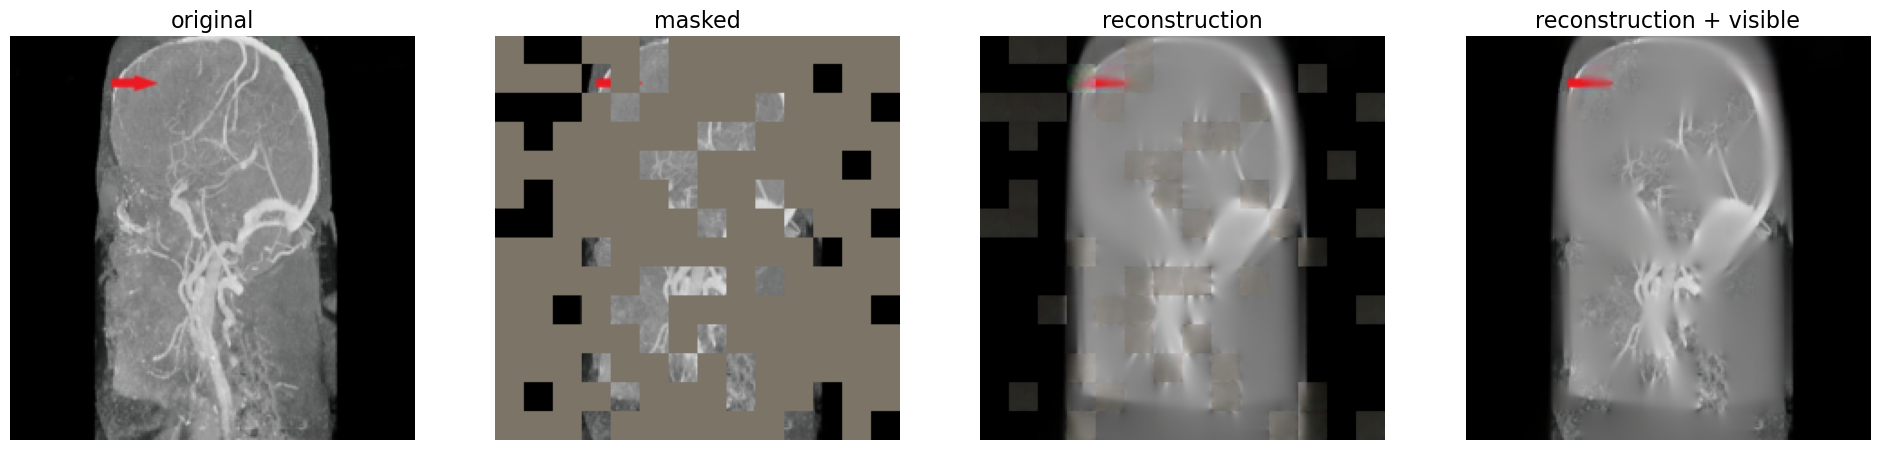

In [49]:
example_image_path = f'/home/CinCin/code/dataset/train3/{files[3]}'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model)

In [ ]:
## 5

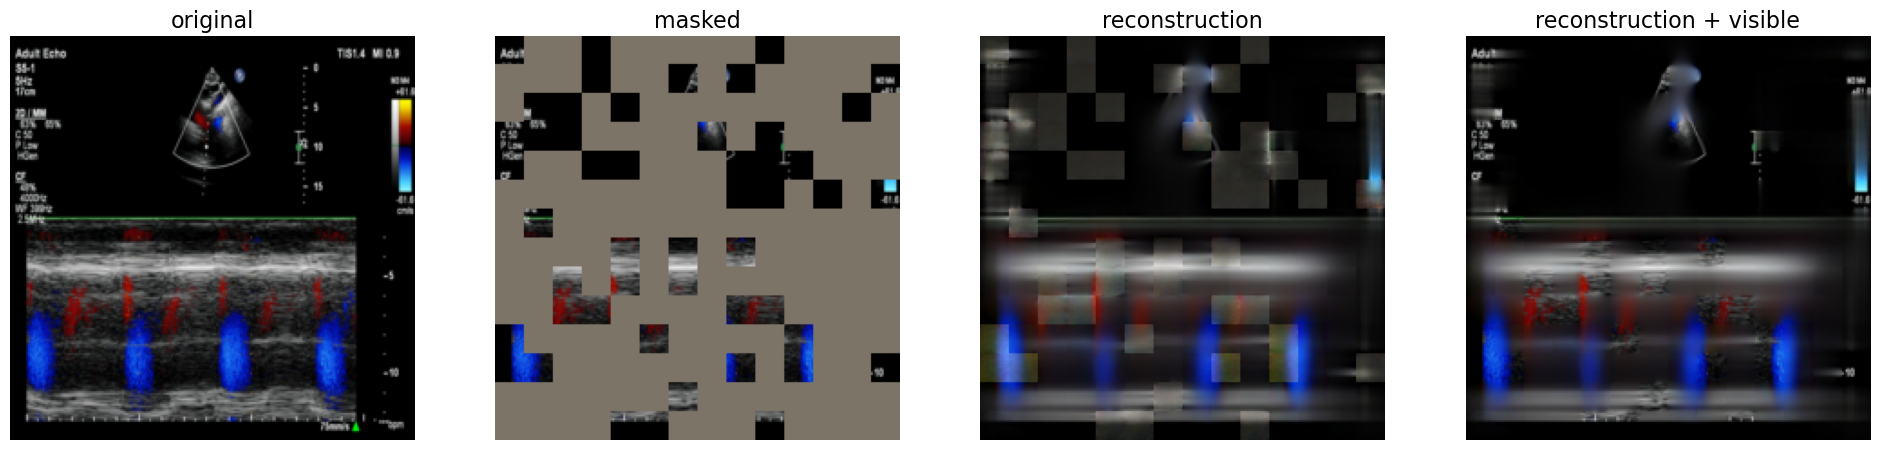

In [50]:
example_image_path = f'/home/CinCin/code/dataset/train3/{files[4]}'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model)

## backup

In [ ]:
# image,caption = test_data[4]['pixel_values'],test_data[4]['labels']
# pixel_values = feature_extractor(image, return_tensors="pt").pixel_values

In [ ]:
# show_image(image,caption)

In [ ]:
# from transformers import ViTMAEForPreTraining
# model = ViTMAEForPreTraining.frشom_pretrained("facebook/vit-mae-base")

# visualize(pixel_values, model)

# fine tuning

In [ ]:
from transformers import ViTMAEForPreTraining

# Load the ViTMAEForPreTraining model
model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")


## 1-2 epoch

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm  # Import tqdm for progress bar

# Define your train function with progress bar and model saving
def train(model, dataloader, optimizer, criterion, num_epochs=5, save_dir='./saved_models'):
    model.train()

    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(num_epochs):
        running_loss = 0.0

        # Initialize tqdm with the total number of batches
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}/{num_epochs}")

        for batch_idx, batch in progress_bar:
            pixel_values = batch['pixel_values']
            targets = batch['targets']
            mask_index = batch['mask_index']

            # Forward pass
            outputs = model(pixel_values=pixel_values)

            y = model.unpatchify(outputs.logits)

            # y = torch.einsum('nchw->nhwc', y).detach()

            # # Visualize the mask
            # mask = outputs.mask.detach()
            # mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)  # (N, H*W, p*p*3)
            # mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
            # mask = torch.einsum('nchw->nhwc', mask).detach()

            # x = torch.einsum('nchw->nhwc', pixel_values)

            # # Masked image
            # im_masked = x * (1 - mask)

            # MAE reconstruction pasted with visible patches
            reconstructed_images = pixel_values + (y * mask_index)



            # Compute loss
            loss = criterion(reconstructed_images, targets)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update tqdm progress bar with current batch loss
            progress_bar.set_postfix({'Loss': running_loss / (batch_idx + 1)})

        # Print epoch loss
        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")

        # Save model checkpoint after each epoch
        checkpoint_name = f"model_epoch{epoch+1}.pt"
        checkpoint_path = os.path.join(save_dir, checkpoint_name)
        torch.save(model.state_dict(), checkpoint_path)

        print(f"Saved model checkpoint at {checkpoint_path}")

# Example usage with ROCODataset and ViTForImageReconstruction
# Assuming ROCODataset and ViTForImageReconstruction are defined and initialized as before

# Initialize DataLoader with your dataset
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Example optimizer and criterion
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = torch.nn.MSELoss()  # Example: MSE loss for mask reconstruction

# Train the model
# train(model, train_loader, optimizer, criterion, num_epochs=5, save_dir='/content/drive/MyDrive/DL1402_2/HW3_part1_finetune')
train(model, train_loader, optimizer, criterion, num_epochs=5, save_dir= "/home/CinCin/code/dataset/model_MAE")
#10:45


## 3 epoch

In [1]:
import torch
from transformers import ViTMAEForPreTraining

# Initialize the ViTMAEForPreTraining model
model_fted = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/dataset/model_MAE/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
model_fted.load_state_dict(state_dict)

/home/CinCin/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<All keys matched successfully>

In [ ]:
import os
import time  # Import time module for timing
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm  # Import tqdm for progress bar

# Define your train function with progress bar and model saving
def train(model, dataloader, optimizer, criterion, num_epochs=5, save_dir='./saved_models'):
    model.train()

    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(num_epochs):
        start_time = time.time()  # Record the start time of the epoch
        running_loss = 0.0

        # Initialize tqdm with the total number of batches
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}/{num_epochs}")

        for batch_idx, batch in progress_bar:
            pixel_values = batch['pixel_values']
            targets = batch['targets']
            mask_index = batch['mask_index']

            # Forward pass
            outputs = model(pixel_values=pixel_values)

            y = model.unpatchify(outputs.logits)

            # MAE reconstruction pasted with visible patches
            reconstructed_images = pixel_values + (y * mask_index)

            # Compute loss
            loss = criterion(reconstructed_images, targets)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update tqdm progress bar with current batch loss
            progress_bar.set_postfix({'Loss': running_loss / (batch_idx + 1)})

        # Print epoch loss
        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")

        # Save model checkpoint after each epoch
        checkpoint_name = f"model_epoch{epoch+1}.pt"
        checkpoint_path = os.path.join(save_dir, checkpoint_name)
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Saved model checkpoint at {checkpoint_path}")

        # Calculate and print the elapsed time for the epoch
        elapsed_time = time.time() - start_time
        print(f"Epoch [{epoch+1}/{num_epochs}] completed in {elapsed_time:.2f} seconds")

# Example usage with ROCODataset and ViTForImageReconstruction
# Assuming ROCODataset and ViTForImageReconstruction are defined and initialized as before

# Initialize DataLoader with your dataset
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Example optimizer and criterion
optimizer = torch.optim.Adam(model_fted.parameters(), lr=1e-4)
criterion = torch.nn.MSELoss()  # Example: MSE loss for mask reconstruction

# Train the model
train(model_fted, train_loader, optimizer, criterion, num_epochs=3, save_dir="/home/CinCin/code/model_MAE")


## epoch 4-5

In [39]:
import torch
from transformers import ViTMAEForPreTraining

# Initialize the ViTMAEForPreTraining model
model_fted = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/model_MAE/model_epoch1.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
model_fted.load_state_dict(state_dict)

<All keys matched successfully>

In [40]:
import os
import time  # Import time module for timing
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm  # Import tqdm for progress bar

# Define your train function with progress bar and model saving
def train(model, dataloader, optimizer, criterion, num_epochs=5, save_dir='./saved_models'):
    model.train()

    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(num_epochs):
        start_time = time.time()  # Record the start time of the epoch
        running_loss = 0.0

        # Initialize tqdm with the total number of batches
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch+1}/{num_epochs}")

        for batch_idx, batch in progress_bar:
            pixel_values = batch['pixel_values']
            targets = batch['targets']
            mask_index = batch['mask_index']

            # Forward pass
            outputs = model(pixel_values=pixel_values)

            y = model.unpatchify(outputs.logits)

            # MAE reconstruction pasted with visible patches
            reconstructed_images = pixel_values + (y * mask_index)

            # Compute loss
            loss = criterion(reconstructed_images, targets)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Update tqdm progress bar with current batch loss
            progress_bar.set_postfix({'Loss': running_loss / (batch_idx + 1)})

        # Print epoch loss
        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss}")

        # Save model checkpoint after each epoch
        checkpoint_name = f"model_epoch{epoch+1}.pt"
        checkpoint_path = os.path.join(save_dir, checkpoint_name)
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Saved model checkpoint at {checkpoint_path}")

        # Calculate and print the elapsed time for the epoch
        elapsed_time = time.time() - start_time
        print(f"Epoch [{epoch+1}/{num_epochs}] completed in {elapsed_time:.2f} seconds")

# Example usage with ROCODataset and ViTForImageReconstruction
# Assuming ROCODataset and ViTForImageReconstruction are defined and initialized as before

# Initialize DataLoader with your dataset
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Example optimizer and criterion
optimizer = torch.optim.Adam(model_fted.parameters(), lr=1e-4)
criterion = torch.nn.MSELoss()  # Example: MSE loss for mask reconstruction

# Train the model
train(model_fted, train_loader, optimizer, criterion, num_epochs=2, save_dir="/home/CinCin/code/model_MAE/model_4and5")
#

Epoch 1/2: 100%|██████████| 1167/1167 [2:05:37<00:00,  6.46s/it, Loss=0.156] 


Epoch [1/2], Loss: 0.15593210544561664
Saved model checkpoint at /home/CinCin/code/model_MAE/model_4and5/model_epoch1.pt
Epoch [1/2] completed in 7537.88 seconds


Epoch 2/2: 100%|██████████| 1167/1167 [2:08:31<00:00,  6.61s/it, Loss=0.154] 


Epoch [2/2], Loss: 0.15357081285632362
Saved model checkpoint at /home/CinCin/code/model_MAE/model_4and5/model_epoch2.pt
Epoch [2/2] completed in 7711.75 seconds


## hmm

In [27]:
import torch
from transformers import ViTMAEForPreTraining

# Initialize the ViTMAEForPreTraining model
model_fted = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/dataset/model_MAE/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
model_fted.load_state_dict(state_dict)

/home/CinCin/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<All keys matched successfully>

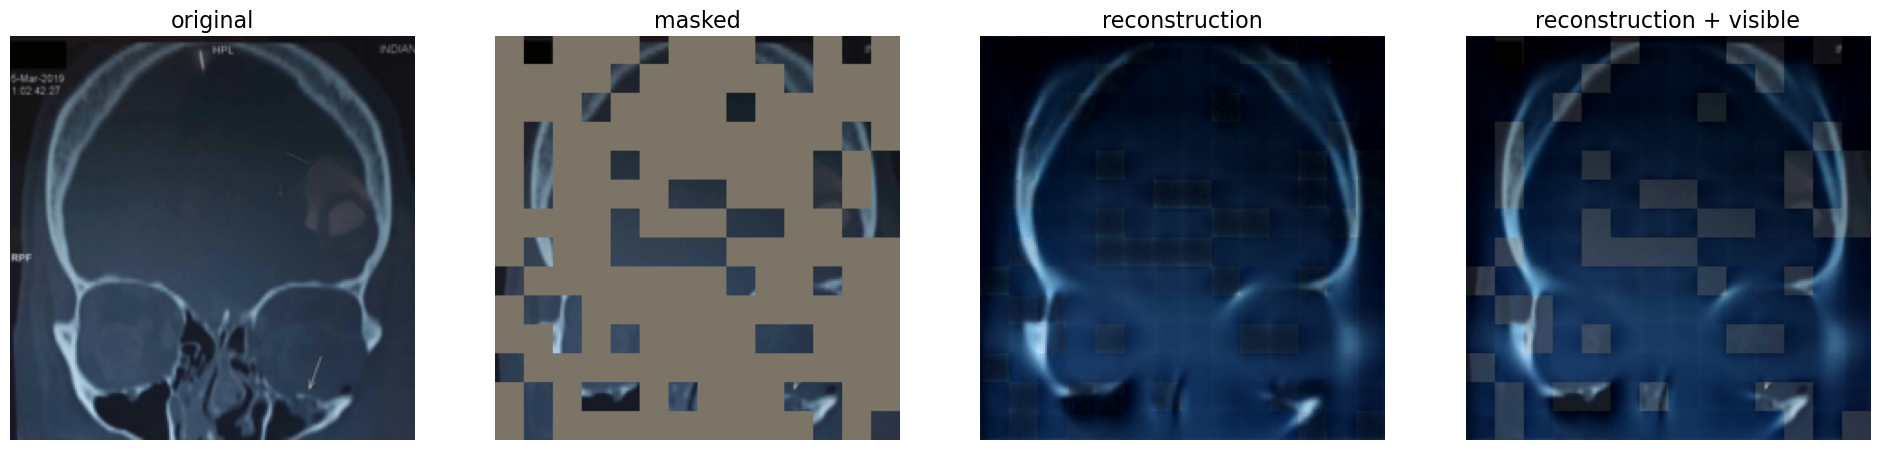

In [38]:
import torch
from transformers import ViTMAEForPreTraining
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load the model and the state dictionary
model_fted = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")
checkpoint_path = "/home/CinCin/code/dataset/model_MAE/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)
model_fted.load_state_dict(state_dict)
model_fted.eval()  # Set model to evaluation mode

# ImageNet normalization values

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)


# Transformation for the input images
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# Function to show image
def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    image = image * torch.tensor(imagenet_std).view(1, 1, 3) + torch.tensor(imagenet_mean).view(1, 1, 3)
    image = torch.clip(image * 255, 0, 255).int()
    plt.imshow(image.numpy())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

# Function to visualize the images
def visualize(pixel_values, model):
    # Forward pass
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # Visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 * 3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

    x = torch.einsum('nchw->nhwc', pixel_values)

    # Masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # Store images and titles in a dictionary
    images = {
        "original": x[0],
        "masked": im_masked[0],
        "reconstruction": y[0],
        "reconstruction + visible": im_paste[0]
    }

    # Make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    for i, (title, image) in enumerate(images.items(), 1):
        plt.subplot(1, 4, i)
        show_image(image, title)

    plt.show()

# Load an example image (replace 'example_image_path' with the actual path to your image)
example_image_path = '/home/CinCin/code/dataset/train3/ROCOv2_2023_train_000010.jpg'
image = Image.open(example_image_path).convert('RGB')
input_tensor = data_transform(image).unsqueeze(0)  # Add batch dimension

# Visualize the results
visualize(input_tensor, model_fted)


## naked

In [ ]:
# # Example optimizer and loss function (MSE loss for reconstruction)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# criterion = torch.nn.MSELoss()

# # Function to train the model for image reconstruction
# def train(model, dataloader, optimizer, criterion, num_epochs=5):
#     model.train()
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for batch in dataloader:
#             pixel_values = batch['pixel_values']
#             targets = batch['targets']

#             # Forward pass
#             outputs = model(pixel_values=pixel_values)
#             reconstructed_images = outputs.logits  # Assuming logits are the reconstructed images

#             # Compute loss
#             loss = criterion(reconstructed_images, targets)

#             # Backward pass and optimize
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader)}")

# # Example usage:
# train_data = ROCODataset(root_dir="/content/drive/MyDrive/DL1402_2/HW3_DEEP/dataset/train3", transform=data_transform)
# train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

# # Train the model for image reconstruction
# train(model, train_loader, optimizer, criterion, num_epochs=5)

## orginal

In [ ]:
# from transformers import ViTMAEConfig

# config = ViTMAEConfig.from_pretrained("facebook/vit-mae-base")

# # Example configuration
# config.learning_rate = 5e-5
# config.batch_size = 16
# config.num_train_epochs = 5
# config.gradient_accumulation_steps = 2

In [ ]:
# from transformers import Trainer, TrainingArguments, DefaultDataCollator

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",
#     num_train_epochs=config.num_train_epochs,
#     per_device_train_batch_size=config.batch_size,
#     per_device_eval_batch_size=config.batch_size,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
#     save_steps=500,
#     save_total_limit=2,
# )

# # Use the default data collator
# data_collator = DefaultDataCollator()

# # Create Trainer instance
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_data,
#     eval_dataset=valid_data,
#     data_collator=data_collator,
# )

# # Train the model
# trainer.train()

# # Save the model and tokenizer
# trainer.save_model("/content/drive/MyDrive/DL1402_2/HW3_DEEP/A1/model")


In [ ]:
# from transformers import Trainer, TrainingArguments

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",  # Directory to save model checkpoints and logs
#     num_train_epochs=config.num_train_epochs,
#     per_device_train_batch_size=config.batch_size,
#     per_device_eval_batch_size=config.batch_size,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',  # Directory to save logs
#     logging_steps=10,
#     save_steps=500,  # Save model every 500 steps (adjust as necessary)
#     save_total_limit=2,  # Limit the total amount of checkpoints (optional)
# )

# # Create Trainer instance
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_data,
#     eval_dataset=valid_data,
# )

# # Train the model
# trainer.train()

# # Save the model and tokenizer at the specified directory
# trainer.save_model("/content/drive/MyDrive/DL1402_2/HW3_DEEP/A1/model")  # Update the path as needed


In [ ]:
import os

directory = '/content/drive/MyDrive/DL1402_2/HW3_DEEP/dataset/train/'
print(os.listdir(directory))
if 'ROCOv2_2023_train_024445.jpg' in os.listdir(directory):
  print('yes')

# Classification

In [19]:
import torch
import torch.nn as nn
from transformers import ViTMAEForPreTraining

# Load pre-trained ViTMAEForPreTraining model
model_name = "facebook/vit-mae-base"
vitmae_model = ViTMAEForPreTraining.from_pretrained(model_name)
# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/model_MAE/model_4and5/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
vitmae_model.load_state_dict(state_dict)

# Extract the relevant parts of the model before the decoder
vit = vitmae_model.vit

# embeddings = vitmae_model.vit.embeddings
# encoder = vitmae_model.vit.encoder
# layernorm = vitmae_model.vit.layernorm

# Define your classifier with the extracted components
class ImageClassifier(nn.Module):
    def __init__(self, vit, num_classes):
        super(ImageClassifier, self).__init__()
        self.vit = vit

        self.classifier_head = nn.Sequential(
            nn.Linear(768, 512),  # Assuming last hidden size is 768
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output layer for classification
        )

    def forward(self, pixel_values):
        # Forward pass through the embeddings
        vit = self.vit(pixel_values)
        
        # Apply the final layer normalization
        
        # Use the [CLS] token representation for classification
        logits = self.classifier_head(vit.last_hidden_state[:, 0])
        return logits

# Initialize your ImageClassifier with the extracted components
num_classes = 2  # Number of classes for binary classification
classifier_model = ImageClassifier(vit, num_classes)

# Example training function
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import os

def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=5, save_dir='./saved_models13'):
    model.train()

    # Create save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training")
        for images, labels in progress_bar:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            progress_bar.set_postfix({'Loss': train_loss / (len(train_loader)), 'Accuracy': correct_train / total_train})

        # Calculate training accuracy and loss
        train_accuracy = correct_train / total_train
        train_loss /= len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        progress_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation")
        with torch.no_grad():
            for images, labels in progress_bar:
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

                progress_bar.set_postfix({'Loss': val_loss / (len(val_loader)), 'Accuracy': correct_val / total_val})

        # Calculate validation accuracy and loss
        val_accuracy = correct_val / total_val
        val_loss /= len(val_loader)

        # Print epoch results
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

        # Save model checkpoint after each epoch
        checkpoint_name = f"model_epoch{epoch+1}.pt"
        checkpoint_path = os.path.join(save_dir, checkpoint_name)
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Saved model checkpoint at {checkpoint_path}")

# Example usage
if __name__ == "__main__":
    # Define dataset paths and transforms
    data_dir = './bone/arch'
    train_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Create datasets
    train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
    val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=val_transforms)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

    # Initialize optimizer and criterion
    optimizer = torch.optim.Adam(classifier_model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    # Train the model
    train_model(classifier_model, train_loader, val_loader, optimizer, criterion, num_epochs=5, save_dir='./saved_models13')


Epoch 1/5 - Training: 100%|█| 277/277 [14:39<00:00,  3.17s/it, Loss=0.581, Accur
Epoch 1/5 - Validation: 100%|█| 19/19 [00:20<00:00,  1.06s/it, Loss=0.437, Accur


Epoch [1/5], Train Loss: 0.5813, Train Acc: 0.6713, Val Loss: 0.4368, Val Acc: 0.7850
Saved model checkpoint at ./saved_models13/model_epoch1.pt


Epoch 2/5 - Training: 100%|█| 277/277 [14:13<00:00,  3.08s/it, Loss=0.378, Accur
Epoch 2/5 - Validation: 100%|█| 19/19 [00:19<00:00,  1.03s/it, Loss=0.55, Accura


Epoch [2/5], Train Loss: 0.3778, Train Acc: 0.8284, Val Loss: 0.5502, Val Acc: 0.7817
Saved model checkpoint at ./saved_models13/model_epoch2.pt


Epoch 3/5 - Training: 100%|█| 277/277 [14:27<00:00,  3.13s/it, Loss=0.233, Accur
Epoch 3/5 - Validation: 100%|█| 19/19 [00:19<00:00,  1.05s/it, Loss=0.632, Accur


Epoch [3/5], Train Loss: 0.2333, Train Acc: 0.9016, Val Loss: 0.6320, Val Acc: 0.7900
Saved model checkpoint at ./saved_models13/model_epoch3.pt


Epoch 4/5 - Training: 100%|█| 277/277 [16:10<00:00,  3.50s/it, Loss=0.158, Accur
Epoch 4/5 - Validation: 100%|█| 19/19 [00:22<00:00,  1.20s/it, Loss=0.539, Accur


Epoch [4/5], Train Loss: 0.1578, Train Acc: 0.9369, Val Loss: 0.5389, Val Acc: 0.8083
Saved model checkpoint at ./saved_models13/model_epoch4.pt


Epoch 5/5 - Training: 100%|█| 277/277 [15:10<00:00,  3.29s/it, Loss=0.116, Accur
Epoch 5/5 - Validation: 100%|█| 19/19 [00:19<00:00,  1.04s/it, Loss=0.492, Accur


Epoch [5/5], Train Loss: 0.1159, Train Acc: 0.9564, Val Loss: 0.4920, Val Acc: 0.8467
Saved model checkpoint at ./saved_models13/model_epoch5.pt


In [24]:
from transformers import ViTMAEForPreTraining, ViTForImageClassification, ViTConfig
import torch

# Step 1: Fine-tune ViTMAEForPreTraining model and save state dict
# Assume you have already fine-tuned and saved the state dict as 'fine_tuned_model.pt'
# Example:
# torch.save(model.state_dict(), 'fine_tuned_model.pt')

# Step 2: Initialize ViTForImageClassification using the same config as ViTMAEForPreTraining
model_name = "facebook/vit-mae-base"
A = ViTMAEForPreTraining.from_pretrained(model_name)
config = ViTConfig.from_pretrained(model_name)
# config.num_labels = 2  # Set number of labels for binary classification
image_classifier_model = ViTForImageClassification(config)
print(A)
print('_________________')
print(config)
print('_________________')
print(image_classifier_model)
# Step 3: Load the fine-tuned weights into ViTForImageClassification
# fine_tuned_weights_path = 'fine_tuned_model.pt'
# state_dict = torch.load('/home/CinCin/code/model_MAE/model_epoch1.pt')
# image_classifier_model.load_state_dict(state_dict)

# Now image_classifier_model is ready to be used for inference or further training


/home/CinCin/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
You are using a model of type vit_mae to instantiate a model of type vit. This is not supported for all configurations of models and can yield errors.


ViTMAEForPreTraining(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bi

In [ ]:
# from transformers import AutoImageProcessor, ViTMAEForPreTraining
# from PIL import Image
# import requests

# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

# processor = AutoImageProcessor.from_pretrained('facebook/vit-mae-base')
# model = ViTMAEForPreTraining.from_pretrained('facebook/vit-mae-base')

# inputs = processor(images=image, return_tensors="pt")
# outputs = model(**inputs)
# loss = outputs.loss
# mask = outputs.mask
# ids_restore = outputs.ids_restore


In [51]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Adjust if needed
])

# Load validation dataset
data_dir = '/home/CinCin/code/bone/arch/val'
val_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)  # Batch size of 4 for visualization

# Load your model
class ImageClassifier(nn.Module):
    def __init__(self, vit, num_classes):
        super(ImageClassifier, self).__init__()
        self.vit = vit
        self.classifier_head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, pixel_values):
        vit = self.vit(pixel_values)
        logits = self.classifier_head(vit.last_hidden_state[:, 0])
        return logits

# Load ViT model
model_name = "facebook/vit-mae-base"
vitmae_model = ViTMAEForPreTraining.from_pretrained(model_name)
# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/model_MAE/model_4and5/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
vitmae_model.load_state_dict(state_dict)

# Extract the relevant parts of the model before the decoder
vit = vitmae_model.vit
num_classes = 2  # Fractured and Not Fractured
model = ImageClassifier(vit, num_classes)

# Load the saved weights
model.load_state_dict(torch.load('/home/CinCin/code/saved_models/model_epoch2.pt'))
model.eval()

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


ImageClassifier(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAEAttention(
            (attention): ViTMAESelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=Tr

In [ ]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Get a batch of images from the validation set
data_iter = iter(val_loader)
images, labels = next(data_iter)

# Move images to GPU if available
images = images.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Convert labels and predictions to numpy
labels = labels.cpu().numpy()
preds = preds.cpu().numpy()

# Plot images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(4):
    ax = axes[0, i]
    imshow(images[i].cpu(), title=f'Label: {labels[i]}, Pred: {preds[i]}')
    ax = axes[1, i]
    imshow(images[i + 4].cpu(), title=f'Label: {labels[i + 4]}, Pred: {preds[i + 4]}')
plt.show()


# meterics

In [7]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch
import torch.nn as nn
from transformers import ViTMAEForPreTraining, ViTForImageClassification, ViTConfig


data_dir = './bone/arch'
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Create datasets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=val_transforms)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [20]:

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Adjust if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Adjust if needed
])

# Load validation dataset
data_dir = '/home/CinCin/code/bone/arch/val'
val_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)  # Batch size of 4 for visualization

# Load your model
class ImageClassifier(nn.Module):
    def __init__(self, vit, num_classes):
        super(ImageClassifier, self).__init__()
        self.vit = vit
        self.classifier_head = nn.Sequential(
            nn.Linear(768, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, pixel_values):
        vit = self.vit(pixel_values)
        logits = self.classifier_head(vit.last_hidden_state[:, 0])
        return logits

# Load ViT model
model_name = "facebook/vit-mae-base"
vitmae_model = ViTMAEForPreTraining.from_pretrained(model_name)
# Load the state dictionary from the saved checkpoint
checkpoint_path = "/home/CinCin/code/model_MAE/model_4and5/model_epoch2.pt"
state_dict = torch.load(checkpoint_path)

# Load the state dictionary into the model
vitmae_model.load_state_dict(state_dict)

# Extract the relevant parts of the model before the decoder
vit = vitmae_model.vit
num_classes = 2  # Fractured and Not Fractured
model = ImageClassifier(vit, num_classes)

# Load the saved weights
model.load_state_dict(torch.load('/home/CinCin/code/saved_models13/model_epoch5.pt'))
model.eval()

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ImageClassifier(
  (vit): ViTMAEModel(
    (embeddings): ViTMAEEmbeddings(
      (patch_embeddings): ViTMAEPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
    )
    (encoder): ViTMAEEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTMAELayer(
          (attention): ViTMAESdpaAttention(
            (attention): ViTMAESdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTMAESelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTMAEIntermediate(
            (dense): Linear(in_features=768, out_features=3072,

Validation: 100%|████| 75/75 [00:03<00:00, 22.95it/s, Loss=1.88, Accuracy=0.677]


Confusion Matrix:
[[329  31]
 [163  77]]
Classification Report:
               precision    recall  f1-score   support

not fractured     0.6687    0.9139    0.7723       360
    fractured     0.7130    0.3208    0.4425       240

     accuracy                         0.6767       600
    macro avg     0.6908    0.6174    0.6074       600
 weighted avg     0.6864    0.6767    0.6404       600

accuracy: 0.6767
Precision: 0.6864
Recall: 0.6767
F1 Score: 0.6404


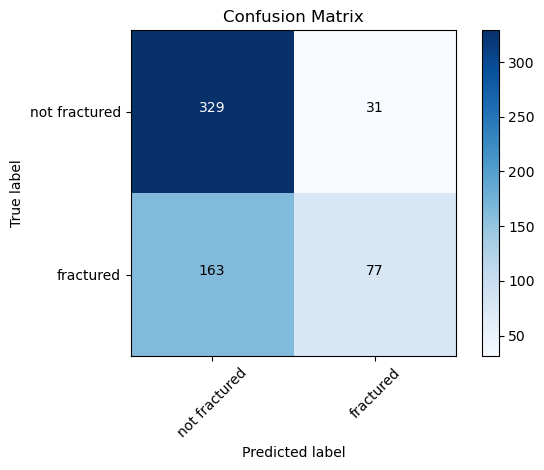

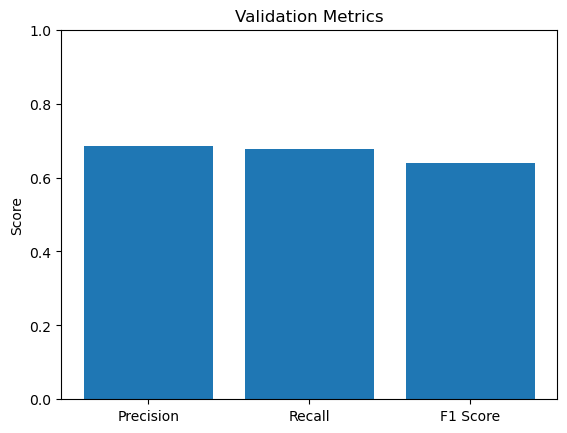

{'val_loss': 1.8821062685308667, 'val_accuracy': 0.6766666666666666, 'confusion_matrix': array([[329,  31],
       [163,  77]]), 'classification_report': '               precision    recall  f1-score   support\n\nnot fractured     0.6687    0.9139    0.7723       360\n    fractured     0.7130    0.3208    0.4425       240\n\n     accuracy                         0.6767       600\n    macro avg     0.6908    0.6174    0.6074       600\n weighted avg     0.6864    0.6767    0.6404       600\n', 'precision': 0.6864046973803071, 'recall': 0.6766666666666666, 'f1_score': 0.6403917759430144}


In [21]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def evaluate_model(model, val_loader, criterion, class_names):
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    # Lists to store predictions and true labels for confusion matrix
    all_val_preds = []
    all_val_labels = []

    progress_bar = tqdm(val_loader, desc="Validation")
    with torch.no_grad():
        for images, labels in progress_bar:
            # Move images and labels to the same device as the model
            images = images.to(next(model.parameters()).device)
            labels = labels.to(next(model.parameters()).device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            progress_bar.set_postfix({'Loss': val_loss / (len(val_loader)), 'Accuracy': correct_val / total_val})

            # Collect predictions and true labels for confusion matrix
            all_val_preds.extend(predicted.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # Calculate validation accuracy and loss
    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    # Calculate metrics for validation set
    # Confusion Matrix
    cm = confusion_matrix(all_val_labels, all_val_preds)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    plt.figure()
    plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')

    # Classification Report
    class_report = classification_report(all_val_labels, all_val_preds, digits=4, target_names=class_names)
    print("Classification Report:")
    print(class_report)

    # Extract precision, recall, and f1-score
    precision = precision_score(all_val_labels, all_val_preds, average='weighted')
    recall = recall_score(all_val_labels, all_val_preds, average='weighted')
    f1 = f1_score(all_val_labels, all_val_preds, average='weighted')

    # Print precision, recall, and f1-score
    print(f'accuracy: {val_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Plot Precision, Recall, F1-score
    metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure()
    plt.bar(metrics.keys(), metrics.values())
    plt.title('Validation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.show()

    return {
        'val_loss': val_loss,
        'val_accuracy': val_accuracy,
        'confusion_matrix': cm,
        'classification_report': class_report,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Example usage:
# val_loader = ...  # your validation data loader
class_names = ['not fractured', 'fractured']
criterion = nn.CrossEntropyLoss()
metrics = evaluate_model(model, val_loader, criterion,class_names)
print(metrics)


Validation: 100%|█| 277/277 [00:12<00:00, 21.37it/s, Loss=0.0771, Accuracy=0.972


Confusion Matrix:
[[4298  182]
 [  68 4315]]
Classification Report:
               precision    recall  f1-score   support

not fractured     0.9844    0.9594    0.9717      4480
    fractured     0.9595    0.9845    0.9718      4383

     accuracy                         0.9718      8863
    macro avg     0.9720    0.9719    0.9718      8863
 weighted avg     0.9721    0.9718    0.9718      8863

accuracy: 0.9718
Precision: 0.9721
Recall: 0.9718
F1 Score: 0.9718


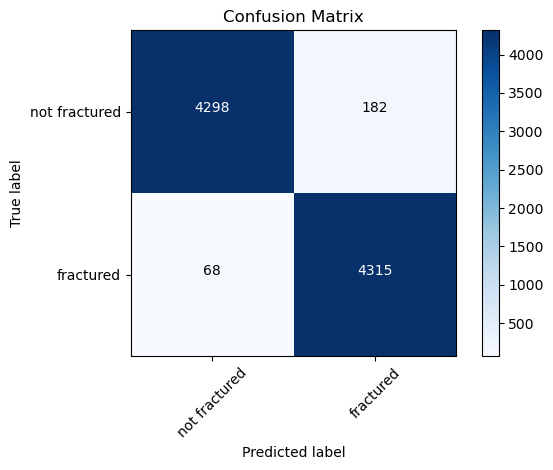

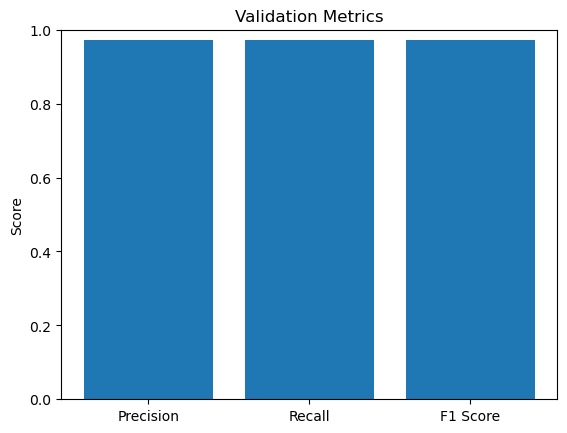

{'val_loss': 0.07714481586052462, 'val_accuracy': 0.9717928466659145, 'confusion_matrix': array([[4298,  182],
       [  68, 4315]]), 'classification_report': '               precision    recall  f1-score   support\n\nnot fractured     0.9844    0.9594    0.9717      4480\n    fractured     0.9595    0.9845    0.9718      4383\n\n     accuracy                         0.9718      8863\n    macro avg     0.9720    0.9719    0.9718      8863\n weighted avg     0.9721    0.9718    0.9718      8863\n', 'precision': 0.9721130773152299, 'recall': 0.9717928466659145, 'f1_score': 0.9717921507558279}


In [23]:
metrics = evaluate_model(model, train_loader, criterion,class_names)
print(metrics)